In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from keras import Sequential
from keras.layers import Input, Dense
from keras.backend import clear_session

In [3]:
filepath_dict = {'yelp':   'sentiment-analysis/yelp_labelled.txt',
                 'amazon': 'sentiment-analysis/amazon_cells_labelled.txt',
                 'imdb':   'sentiment-analysis/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)

In [9]:
sentences = ['John likes ice cream', 'John hates chocolate.']

In [16]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'John': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}

In [18]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]], dtype=int64)

In [87]:
df_yelp = df[df['source']=='yelp']
sentences = df_yelp['sentence'].values
labels = df_yelp['label'].values
X_train_yelp, X_test_yelp, y_train_yelp, y_test_yelp = train_test_split(sentences, labels, test_size=0.25, random_state=42)

In [41]:
X_train

<750x1728 sparse matrix of type '<class 'numpy.int64'>'
	with 7387 stored elements in Compressed Sparse Row format>

In [88]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train_yelp)

X_train_yelp = vectorizer.transform(X_train_yelp)
X_test_yelp = vectorizer.transform(X_test_yelp)

In [44]:
classifier = LogisticRegression()
classifier.fit(X_train_yelp, y_train_yelp)

print(classifier.score(X_test_yelp, y_test_yelp))

0.816


In [4]:
for source in df['source'].unique():

    df_source = df[df['source']==source]
    sentences = df_source['sentence'].values
    labels = df_source['label'].values

    X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25, random_state=42)

    vectorizer = CountVectorizer()
    vectorizer.fit(X_train)

    X_train = vectorizer.transform(X_train)
    X_test = vectorizer.transform(X_test)

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    print(f'{source:10s}: {classifier.score(X_test, y_test):.3f}')

yelp      : 0.816
amazon    : 0.844
imdb      : 0.727


In [18]:
df_source = df[df['source']=='imdb']
sentences = df_source['sentence'].values
labels = df_source['label'].values
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25, random_state=42)

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [13]:
model = Sequential(
    [
        Input(shape=(X_train.shape[1],), name='input_text'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                15720     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 15,731
Trainable params: 15,731
Non-trainable params: 0
_________________________________________________________________


In [14]:
%%time

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=10,
    verbose=2,
    validation_data=(X_test, y_test)
)

Epoch 1/100
75/75 - 1s - loss: 0.6834 - accuracy: 0.5880 - val_loss: 0.6693 - val_accuracy: 0.6840
Epoch 2/100
75/75 - 0s - loss: 0.6209 - accuracy: 0.8280 - val_loss: 0.6120 - val_accuracy: 0.7560
Epoch 3/100
75/75 - 0s - loss: 0.5228 - accuracy: 0.8880 - val_loss: 0.5469 - val_accuracy: 0.8040
Epoch 4/100
75/75 - 0s - loss: 0.4168 - accuracy: 0.9267 - val_loss: 0.4901 - val_accuracy: 0.8160
Epoch 5/100
75/75 - 0s - loss: 0.3274 - accuracy: 0.9560 - val_loss: 0.4485 - val_accuracy: 0.8400
Epoch 6/100
75/75 - 0s - loss: 0.2569 - accuracy: 0.9720 - val_loss: 0.4228 - val_accuracy: 0.8480
Epoch 7/100
75/75 - 0s - loss: 0.2044 - accuracy: 0.9800 - val_loss: 0.4067 - val_accuracy: 0.8560
Epoch 8/100
75/75 - 0s - loss: 0.1653 - accuracy: 0.9840 - val_loss: 0.3945 - val_accuracy: 0.8520
Epoch 9/100
75/75 - 0s - loss: 0.1347 - accuracy: 0.9893 - val_loss: 0.3869 - val_accuracy: 0.8520
Epoch 10/100
75/75 - 0s - loss: 0.1107 - accuracy: 0.9960 - val_loss: 0.3830 - val_accuracy: 0.8600
Epoch 11/

In [15]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8480


In [16]:
def plot_history(history):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,3))
    fig.subplots_adjust(hspace=0.5)
    
    ax1.plot(history['loss'], label='loss')
    ax1.plot(history['val_loss'], label='val_loss')
    ax1.set_ylim([0, 1])
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(history['accuracy'], label='Accuracy')
    ax2.plot(history['val_accuracy'], label='Validation Accuracy')
    ax2.set_ylim([0, 1])
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

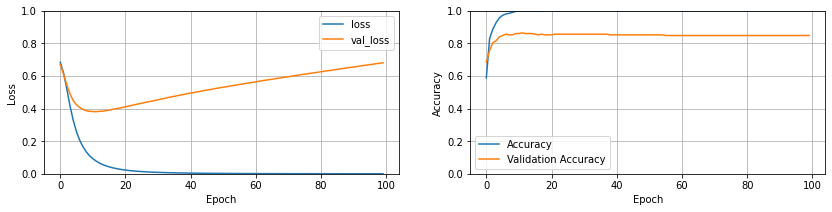

In [17]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist
plot_history(hist)

In [11]:
clear_session()